# Imports

In [1]:
# Remember to login to wandb!
import sys
import os 
import torch
import matplotlib.pyplot as plt
import copy 
# Append module directory for imports
parent_dir = os.path.expanduser('../eigenestimation')
sys.path.append(parent_dir)

from toy_models.tms import AutoencoderSymmetric, GenerateTMSData, GenerateTMSDataParallel, AutoencoderParallel  # Import your model
from evaluation.networks import DrawNeuralNetwork
from eigenmodel.eigenmodel import EigenModel
from utils.loss import MSELoss

# Initial TMS Model

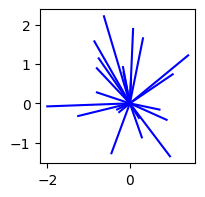

In [3]:
# Load TMS model
original_model = "../outputs/toy_models/high_rank.pt"

model = torch.load(original_model)['model']

# Plot TMS representations.
en = copy.deepcopy(model.W_in).detach().cpu().numpy().transpose()

plt.figure(figsize=(2,2))
for i in range(en.shape[1]):
  plt.plot([0, en[0,i]], [0,en[1,i]], 'b-')
plt.show()

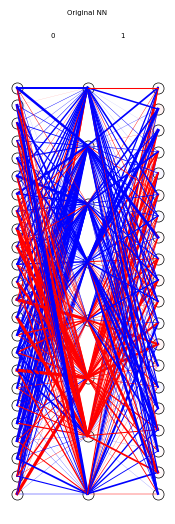

In [4]:
# Load TMS model
model_params = dict(model.named_parameters())
weights = {k:v for k,v in model_params.items() if 'b' not in k}
weights = {str(i):v.transpose(0,1) for i,v in enumerate(weights.values())}

biases = {k:v for k,v in model_params.items() if 'b' in k}
biases = {str(i+1):v for i,v in enumerate(biases.values())}

f = DrawNeuralNetwork(weights, biases, "Original NN")
# Save figure
f.savefig('../figures/7_correlated_inputs/original_nn.svg', transparent=True, bbox_inches='tight')

In [7]:
eigenmodel_path = "../outputs/eigenmodels/correlated_input.pt"
tms_model_p = torch.load(eigenmodel_path)['model']

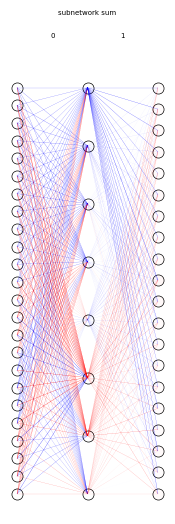

In [5]:
checkpoint = torch.load(eigenmodel_path)
eigenmodel = checkpoint['model']


model_params = eigenmodel.reconstruct_network()
weights = {k:v.transpose(0,1) for k,v in model_params.items() if 'b' not in k}
weights = {str(i):v for i,v in enumerate(weights.values())}

biases = {k:v for k,v in model_params.items() if 'b' in k}
biases = {str(i+1):v for i,v in enumerate(biases.values())}


figs = DrawNeuralNetwork(weights, biases, title='subnetwork sum')

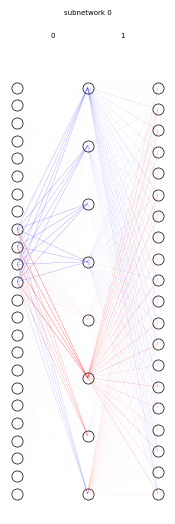

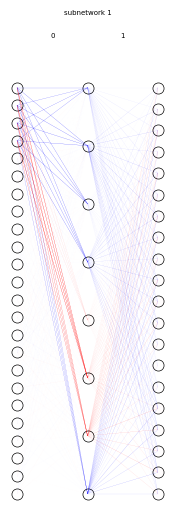

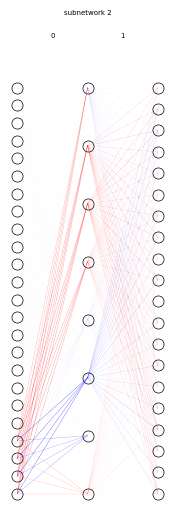

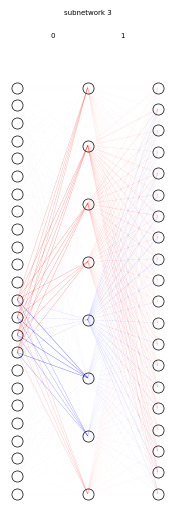

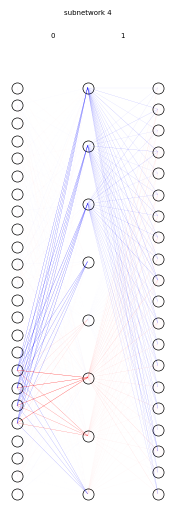

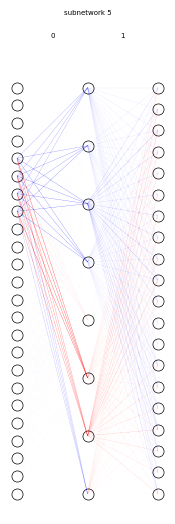

In [ ]:
figs = []

for i, network in enumerate(eigenmodel.construct_subnetworks()):
    weights = {k:v.transpose(0,1) for k,v in network.items() if 'b' not in k}
    weights = {str(i):v for i,v in enumerate(weights.values())}

    biases = {k:v for k,v in network.items() if 'b' in k}
    biases = {str(i+1):v for i,v in enumerate(biases.values())}

    f = DrawNeuralNetwork(weights, biases, title=f'subnetwork {i}')
    
    # Save as high_rank_subnetwork_{i}.svg
    f.savefig(f'../figures/7_correlated_inputs/correlated_inputs_subnetworks{i}.svg', transparent=True, bbox_inches='tight')


-----


# Loss of Various Ranks

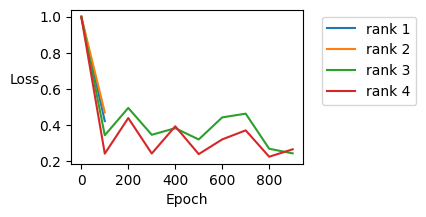

In [37]:
# Get loss metrics from a wandb run
import wandb
import pandas as pd

plt.figure(figsize=(3, 2))
for i in range(1, 5):
    project_path = f"brianna-chrisman-2024/high-rank-eigenmodel-rank{i}"  # entity/project
    api = wandb.Api()

    #project_path = f"brianna-chrisman-2024/tms-eigenmodel"  # entity/project
    runs = api.runs(project_path)

    # Get the latest run (first in the list)
    latest_run = runs[len(runs)-1]

    # Convert history (logged metrics) to a DataFrame
    history = latest_run.history()


    # Filter only loss metrics (adjust based on your naming convention)
    loss_columns = 'train/loss'
    loss_metrics = history[loss_columns]  # Include step count
    epochs = history['epoch']  # Include step count
    epochs = epochs[loss_metrics.notna()]
    loss_metrics = loss_metrics[loss_metrics.notna()]
    plt.plot(epochs, loss_metrics, label=f'rank {i}')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Epoch')
plt.ylabel('Loss', rotation=0, labelpad=10)
plt.tight_layout()
plt.savefig('../figures/7_correlated_inputs/loss_over_ranks.svg', transparent=True, bbox_inches='tight')
plt.show()


In [23]:
runs[-1]

<Run brianna-chrisman-2024/high-rank-eigenmodel-rank2/4mrlwfmz (running)>

In [13]:
history = latest_run.history(samples=10000, pandas=True)
print("History DataFrame shape:", history.shape)
print("History columns:", history.columns.tolist())
print(history.head())

History DataFrame shape: (0, 0)
History columns: []
Empty DataFrame
Columns: []
Index: []


In [67]:
runs

<Runs brianna-chrisman-2024/high-rank-eigenmodel-rank1>

In [63]:
latest_run

<Run brianna-chrisman-2024/high-rank-eigenmodel-rank1/3ukkv8b6 (finished)>

In [59]:
history

""


In [48]:
# Filter only loss metrics (adjust based on your naming convention)
loss_metrics = history['train/loss']  # Include step count
epochs = history['epoch']  # Include step count
epochs = epochs[loss_metrics.notna()]
loss_metrics = loss_metrics[loss_metrics.notna()]

In [49]:
loss_metrics

0    0.212918
2    0.080494
4    0.075262
6    0.077838
8    0.076852
Name: train/loss, dtype: float64

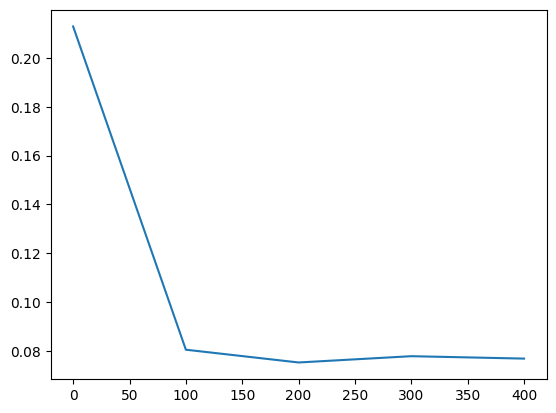

In [51]:
plt.plot(epochs, loss_metrics)

AttributeError: Line2D.set() got an unexpected keyword argument 'ignore_na'

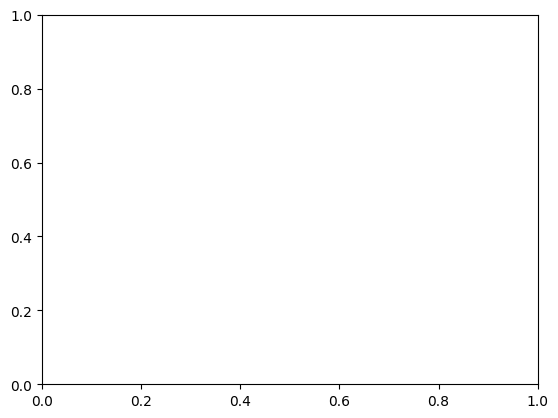

In [ ]:
plt.plot(epochs, loss_metrics, ignore_na=True)

In [29]:
loss_metrics

,train/loss
0,0.212918
1,NaN
2,0.080494
3,NaN
4,0.075262
5,NaN
6,0.077838
7,NaN
8,0.076852
9,NaN
